In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

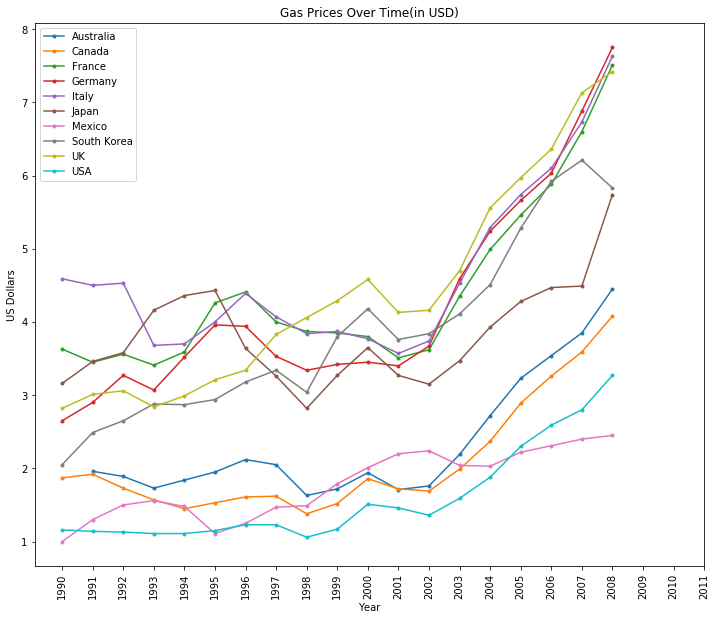

In [2]:
gas = pd.read_csv('gas_prices.csv')
plt.figure(figsize=(12,10))
plt.title('Gas Prices Over Time(in USD)')
for country in gas:
    if country != 'Year':
        plt.plot(gas.Year, gas[country], marker='.',label = gas[country].name)
plt.xticks(gas.Year.tolist() +[2009,2010,2011], rotation='vertical')
plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.legend()
plt.savefig('gas_fig.png',dpi=300)
plt.show()

In [3]:
gas.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


In [4]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


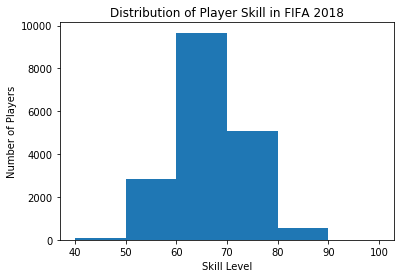

In [5]:
bins = [40,50,60,70,80,90,100]
plt.hist(fifa.Overall,bins = bins)
plt.xticks(bins)
plt.ylabel('Number of Players')
plt.xlabel("Skill Level")
plt.title('Distribution of Player Skill in FIFA 2018')
plt.yticks()
plt.show()

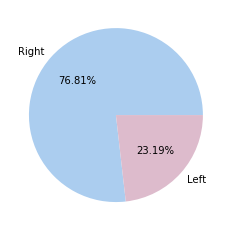

In [6]:
pref = fifa['Preferred Foot'].value_counts()
pref = pref.reset_index()
pref.columns = ['Preferred Foot', 'Count']
colors = ['#abcdef','#ddbbcc']
plt.pie(pref['Count'], labels = pref['Preferred Foot'], colors = colors,autopct= '%.2f%%')
plt.show()

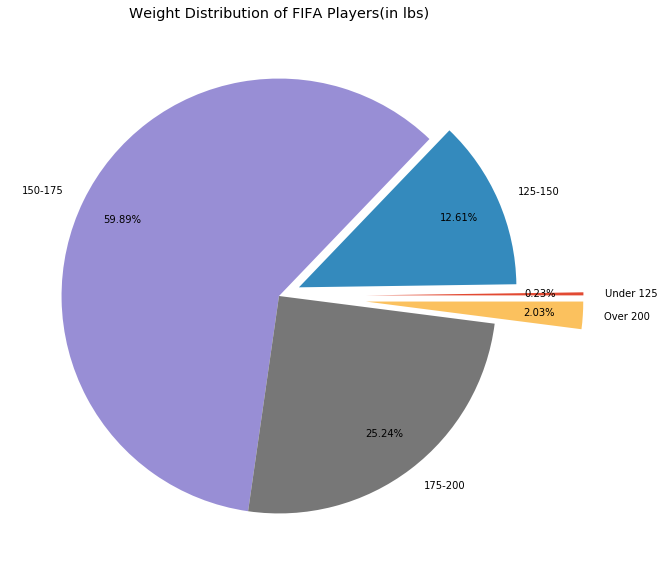

In [22]:
fifa.Weight=[int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[(fifa.Weight) >= 200].count()[0]
weights = [light, light_medium, medium, medium_heavy,heavy]
labels=['Under 125', '125-150', '150-175', '175-200', 'Over 200']
plt.pie(weights, labels=labels, autopct='%.2f%%', pctdistance=0.8,explode=[0.4,0.1,0,0,0.4])
plt.title('Weight Distribution of FIFA Players(in lbs)')
plt.show()

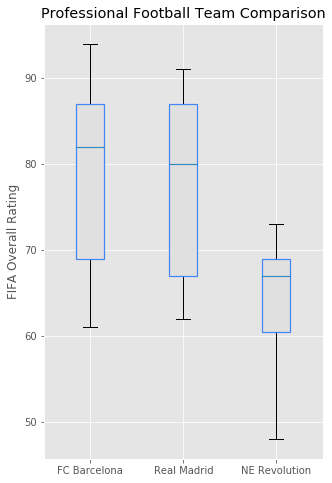

In [39]:
plt.figure(figsize=(5,8))
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']
boxes = plt.boxplot([barcelona, madrid, revs], labels=['FC Barcelona','Real Madrid', 'NE Revolution'], patch_artist=True, medianprops={'linewidth':1.2})
for box in boxes['boxes']:
    box.set(color='#4286f4', linewidth=1.2)
    box.set(facecolor='#e0e0e0')
plt.title('Professional Football Team Comparison')
plt.ylabel('FIFA Overall Rating')
plt.show()